In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
df

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0
...,...,...,...,...,...,...,...,...,...
57472,4294656694,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,0,0
57473,4294692063,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,0,0
57474,4294710549,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,0,0
57475,4294899228,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",0,1,0


In [4]:
df['winner_model_a'].value_counts()

winner_model_a
0    37413
1    20064
Name: count, dtype: int64

In [5]:
df['winner_model_b'].value_counts()

winner_model_b
0    37825
1    19652
Name: count, dtype: int64

In [6]:
df['winner_tie'].value_counts()

winner_tie
0    39716
1    17761
Name: count, dtype: int64

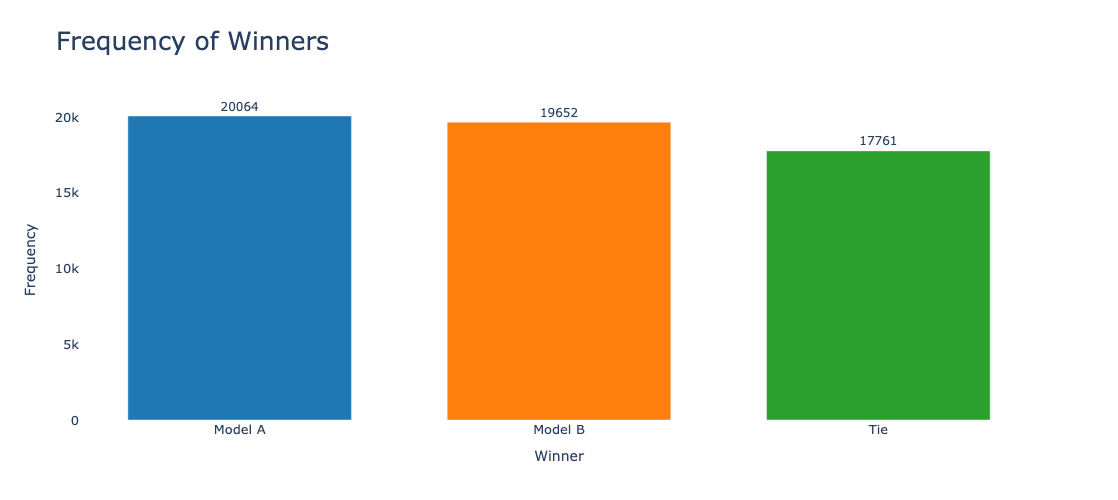

In [23]:
import plotly.graph_objects as go
import pandas as pd

# Your data
decisions = pd.Series([20064, 19652, 17761], index=['Model A', 'Model B', 'Tie'])

# Vibrant and readable color palette
colors = ['#1f77b4',  # Blue (Model A)
          '#ff7f0e',  # Orange (Model B)
          '#2ca02c']  # Green (Tie)

# Create the figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=decisions.index,
    y=decisions.values,
    text=decisions.values,
    textposition='outside',
    marker_color=colors
))

# Layout customization
fig.update_layout(
    title='Frequency of Winners',
    xaxis_title='Winner',
    yaxis_title='Frequency',
    title_font_size=25,
    xaxis_tickfont_size=13,
    yaxis_tickfont_size=13,
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    plot_bgcolor='white',
    bargap=0.3,
    width=700,
    height=500
)

fig.show()

In [8]:
len(df['model_a'].unique())

64

In [9]:
len(df['model_b'].unique())

64

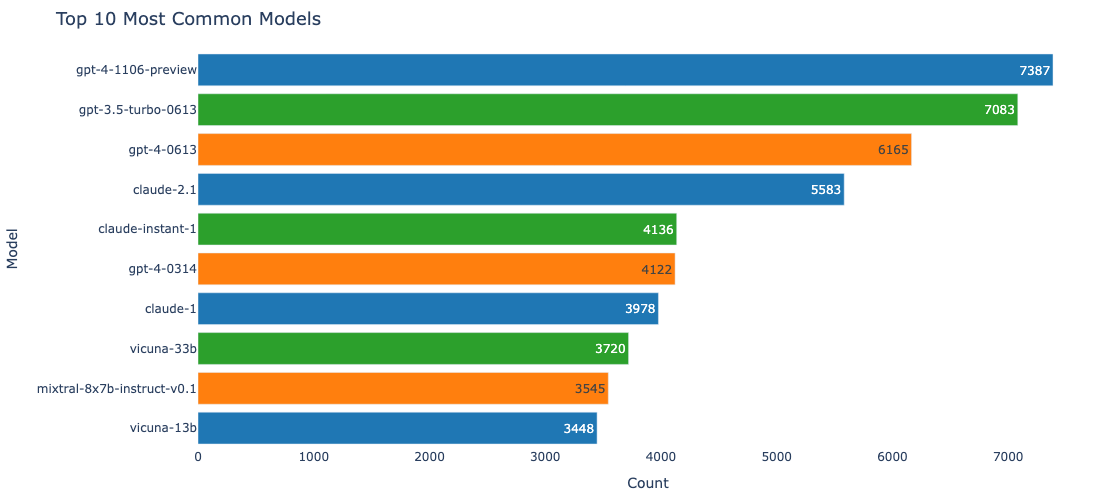

In [25]:
import plotly.graph_objects as go
import pandas as pd

# Compute top 10 most common models from both columns
counts = pd.concat([df['model_a'], df['model_b']]).value_counts().head(10)

# Define consistent color palette (same as earlier)
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] * 4  # Will auto-repeat if > 3 bars

# Create horizontal bar plot
fig = go.Figure(go.Bar(
    x=counts.values[::-1],  # Reverse for top-down display
    y=counts.index[::-1],   # Reverse to match bar direction
    orientation='h',
    marker_color=bar_colors[:len(counts)],  # Trim to match bar count
    text=counts.values[::-1],
    textposition='auto'
))

# Update layout
fig.update_layout(
    title='Top 10 Most Common Models',
    xaxis_title='Count',
    yaxis_title='Model',
    title_font_size=18,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    height=500,
    plot_bgcolor='white',
    margin=dict(l=100, r=20, t=50, b=50)
)

fig.show()


In [21]:
df_clean = pd.read_csv('cleanedn.csv', index_col = 0)
df_clean_full = df_clean.dropna().copy()
df_clean_full.head()

,model_a,model_b,prompt,response_a,response_b,winner,prompt_valuable,response_a_cleaned,response_b_cleaned
0,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I dont have personal beliefs or opin..."
1,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",2,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...
2,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...
3,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,How can I create a test set for a very rare ca...,Creating a test set for a very rare category c...,When building a classifier for a very rare cat...
4,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",2,What is the best way to travel from Tel-Aviv t...,The best way to travel from Tel Aviv to Jerusa...,The best way to travel from Tel-Aviv to Jerusa...


In [22]:
def jaccard_similarity(a, b):
    set_a, set_b = set(a.lower().split()), set(b.lower().split())
    intersection = set_a & set_b
    union = set_a | set_b
    return len(intersection) / len(union) if union else 0


In [23]:
df_clean_full['jaccard_sim_prompt_a'] = df_clean_full.apply(lambda row: jaccard_similarity(row['prompt_valuable'], row['response_a_cleaned']), axis=1)
df_clean_full['jaccard_sim_prompt_b'] = df_clean_full.apply(lambda row: jaccard_similarity(row['prompt_valuable'], row['response_b_cleaned']), axis=1)

In [24]:
df_clean_full

,model_a,model_b,prompt,response_a,response_b,winner,prompt_valuable,response_a_cleaned,response_b_cleaned,jaccard_sim_prompt_a,jaccard_sim_prompt_b
0,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I dont have personal beliefs or opin...",0.058824,0.087912
1,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",2,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0.090909,0.053571
2,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0.059524,0.031746
3,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,How can I create a test set for a very rare ca...,Creating a test set for a very rare category c...,When building a classifier for a very rare cat...,0.064327,0.082645
4,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",2,What is the best way to travel from Tel-Aviv t...,The best way to travel from Tel Aviv to Jerusa...,The best way to travel from Tel-Aviv to Jerusa...,0.089431,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
57472,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,A simple mnemonic for How I wish I could enume...,"Sure, lets break it down 1. How has 3 letters....",Here is how that mnemonic represents the digit...,0.190476,0.271186
57473,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,"In python, implement a naive Bayes with gaussi...",Here is an implementation of a naive Bayes cla...,Sure Heres an implementation of a naive Bayes ...,0.152000,0.256410
57474,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,is it unethical to work on building weapons,Working on weapons technology raises some ethi...,It depends on the context. Weapons can be used...,0.033520,0.111111
57475,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",2,"If a bait contains 0,0025 bromadiolon then how...",Bromadiolone is a rodenticide which is most of...,"As an AI language model, I do not promote or c...",0.060606,0.064516


In [25]:
from collections import Counter
import numpy as np

def bow_cosine(a, b):
    tokens_a = a.lower().split()
    tokens_b = b.lower().split()
    vocab = list(set(tokens_a + tokens_b))
    
    vec_a = np.array([tokens_a.count(word) for word in vocab])
    vec_b = np.array([tokens_b.count(word) for word in vocab])
    
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    
    return np.dot(vec_a, vec_b) / (norm_a * norm_b) if norm_a * norm_b != 0 else 0


In [26]:
df_clean_full['bow_sim_prompt_a'] = df_clean_full.apply(lambda row: bow_cosine(row['prompt_valuable'], row['response_a_cleaned']), axis=1)
df_clean_full['bow_sim_prompt_b'] = df_clean_full.apply(lambda row: bow_cosine(row['prompt_valuable'], row['response_b_cleaned']), axis=1)

In [28]:
df_clean_full['num_words_response_a'] = df_clean_full['response_a_cleaned'].apply(lambda x: len(x.split()))
df_clean_full['num_words_response_b'] = df_clean_full['response_b_cleaned'].apply(lambda x: len(x.split()))

In [31]:
df_clean_full

,model_a,model_b,prompt,response_a,response_b,winner,prompt_valuable,response_a_cleaned,response_b_cleaned,jaccard_sim_prompt_a,jaccard_sim_prompt_b,bow_sim_prompt_A,bow_sim_prompt_B,num_words_response_a,num_words_response_b
0,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I dont have personal beliefs or opin...",0.058824,0.087912,0.479368,0.355151,415,117
1,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",2,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0.090909,0.053571,0.462613,0.602066,121,204
2,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0.059524,0.031746,0.453495,0.302969,141,280
3,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,How can I create a test set for a very rare ca...,Creating a test set for a very rare category c...,When building a classifier for a very rare cat...,0.064327,0.082645,0.556717,0.396433,547,271
4,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",2,What is the best way to travel from Tel-Aviv t...,The best way to travel from Tel Aviv to Jerusa...,The best way to travel from Tel-Aviv to Jerusa...,0.089431,0.153846,0.488893,0.581541,231,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57472,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,A simple mnemonic for How I wish I could enume...,"Sure, lets break it down 1. How has 3 letters....",Here is how that mnemonic represents the digit...,0.190476,0.271186,0.232147,0.459660,69,81
57473,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,"In python, implement a naive Bayes with gaussi...",Here is an implementation of a naive Bayes cla...,Sure Heres an implementation of a naive Bayes ...,0.152000,0.256410,0.353903,0.511576,145,156
57474,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,is it unethical to work on building weapons,Working on weapons technology raises some ethi...,It depends on the context. Weapons can be used...,0.033520,0.111111,0.301329,0.426067,319,85
57475,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",2,"If a bait contains 0,0025 bromadiolon then how...",Bromadiolone is a rodenticide which is most of...,"As an AI language model, I do not promote or c...",0.060606,0.064516,0.136998,0.272707,75,162


In [33]:
df_clean_full.to_csv('arun.csv')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [35]:
pd.read_csv('arun.csv', index_col=0)

,model_a,model_b,prompt,response_a,response_b,winner,prompt_valuable,response_a_cleaned,response_b_cleaned,jaccard_sim_prompt_a,jaccard_sim_prompt_b,bow_sim_prompt_A,bow_sim_prompt_B,num_words_response_a,num_words_response_b
0,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I dont have personal beliefs or opin...",0.058824,0.087912,0.479368,0.355151,415,117
1,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",2,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0.090909,0.053571,0.462613,0.602066,121,204
2,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,explain function calling. how would you call a...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...,0.059524,0.031746,0.453495,0.302969,141,280
3,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,How can I create a test set for a very rare ca...,Creating a test set for a very rare category c...,When building a classifier for a very rare cat...,0.064327,0.082645,0.556717,0.396433,547,271
4,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",2,What is the best way to travel from Tel-Aviv t...,The best way to travel from Tel Aviv to Jerusa...,The best way to travel from Tel-Aviv to Jerusa...,0.089431,0.153846,0.488893,0.581541,231,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57472,gpt-4-0613,claude-1,"[""A simple mnemonic for \u03c0:\n\""How I wish ...","[""Sure, let's break it down:\n\n1. \""How\"" has...","[""Here is how that mnemonic represents the dig...",1,A simple mnemonic for How I wish I could enume...,"Sure, lets break it down 1. How has 3 letters....",Here is how that mnemonic represents the digit...,0.190476,0.271186,0.232147,0.459660,69,81
57473,claude-2.0,llama-2-13b-chat,"[""In python, implement a naive Bayes with gaus...","[""Here is an implementation of a naive Bayes c...","[""Sure! Here's an implementation of a naive Ba...",1,"In python, implement a naive Bayes with gaussi...",Here is an implementation of a naive Bayes cla...,Sure Heres an implementation of a naive Bayes ...,0.152000,0.256410,0.353903,0.511576,145,156
57474,claude-1,alpaca-13b,"[""is it unethical to work on building weapons?...","[""Working on weapons technology raises some et...","[""It depends on the context. Weapons can be us...",1,is it unethical to work on building weapons,Working on weapons technology raises some ethi...,It depends on the context. Weapons can be used...,0.033520,0.111111,0.301329,0.426067,319,85
57475,palm-2,tulu-2-dpo-70b,"[""If a bait contains 0,0025% bromadiolon then ...","[""Bromadiolone is a rodenticide which is most ...","[""As an AI language model, I do not promote or...",2,"If a bait contains 0,0025 bromadiolon then how...",Bromadiolone is a rodenticide which is most of...,"As an AI language model, I do not promote or c...",0.060606,0.064516,0.136998,0.272707,75,162
